In [221]:
## Chapter 13

## A learning task

The displayed line through the origin classifies the points in the plane, with the light blue above and the light red below.

In particular, it classifies the displayed purple dots.

Task: *using only* the displayed purple dots and knowledge of how they are classified by the displayed line, *compute* a second line through the origin which is approximately correct in the following ways:

1. classifies the purple dots the same (or approximately the same) as the displayed line, 

2. has high probability of succeeding on other dots

In this case, high probability means that the area between the two lines should be small.

In [222]:
import math 
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt   
import metakernel
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import seaborn as sns
sns.set_palette('pastel')
pastel_palette = sns.color_palette('pastel')
import random

In [223]:
def sign(x):
    return 1 if x > 0 else -1

In [224]:
# generate linearlly separate target data

m1 = random.choice([-.25, .25])*np.random.rand(1)
m2 = random.choice([-.25,.25])*np.random.rand(1)
b = 0

# number of data points

n = 25

# generate training data 

def f(x1, x2):
    return m1*x1 + m2*x2+ b

data_x1 = np.random.uniform(-.5, .5, n)
data_x2 = np.random.uniform(-.5, .5, n)
data_0 = list(zip(data_x1, data_x2))
data_1 = [(x1, x2, sign(f(x1, x2))) for x1, x2 in data_0]


In [225]:
# define update function 

def update(w, data):
    misclassifed = [x for x in data if x[2] != sign(w[0]*x[0]+w[1]*x[1])]
    if len(misclassifed) == 0:
        return w, np.array([0, 0])
    else:
        x1, x2, y = random.choice(misclassifed)
        return w+y*np.array([x1, x2]), np.array([x1, x2])



# Define the number of iterations
l = 50

# Create a list to store all stages of w
w_stages = [[.25,-.25]]
w_points = [[0,0]]

# Run the update function over and over again
for _ in range(l):
    w, p = update(w_stages[-1], data_1)
    w_stages.append(list(w))  # Append the current stage of w to w_stages
    w_points.append(list(p))  # Append the current stage of w to w_stages 

print(w_stages)
print(w_points)   


[[0.25, -0.25], [0.01923971949683001, -0.007407431739065773], [-0.12156982270442229, 0.2620810251508604], [0.2389022521599975, 0.3818006606609835], [0.004734864261280558, 0.5068665502322189], [0.27238221036435595, 0.4265478851445904], [0.03821482246563901, 0.5516137747158258], [0.5252756320577522, 0.3539282353712926], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.2945153515545822, 0.5965208036322268], [0.29451

## The perceptron algorithm

### Formatting the data

Since we know the purple points and the way that they are classified by the displayed line, we can view the data as organized as $(x_1, y_1, \pm 1), \ldots, (x_n, y_n, \pm 1)$, where $+1$ indicates that it was above the displayed line, and $-1$ indicates that it was below the displayed line.

### Formatting lines

Lines through the origin can be represented as pairs $(w_0, w_1)$ that determine the line 

$$\{(x,y): w_0\cdot x + w_1\cdot y=0\}$$

By setting $m=-\frac{w_0}{w_1}\cdot x$ one can put this in the more familiar format $y=mx$.

### The update procedure

We view ourselves as constructing lines represented by $(w_0(t), w_1(t))$ as a variable of the time $t=0, 1, 2, \ldots$. 

At $t=0$, we choose an arbitrary line (we choose $w_0(t)=\frac{1}{4}$ and $w_1(t)=-\frac{1}{4}$). 

At stage $t$, if we have correctly classified all the data, then we do nothing. 

But at stage $t+1$, if we have incorrectly classified a point as $\mp 1$ where we should have put $\pm 1$, we choose such a point $(x(t), y(t))$, and we shift to 

$$w_0(t+1) = w_0(t)\pm x(t)$$

$$w_1(t+1) = w_1(t)\pm y(t)$$

In the digrams below, the new line with represented by $(w_0(t+1), w_1(t+1))$ is drawn with a green line, and the point  $(x(t), y(t))$ incorrectly classified at stage $(w_0(t), w_1(t))$ is drawn with a big red dot.


In [226]:
def visual_perceptron(j, last_points = False):

    x = np.linspace(-.5, .5, 100)
    y = np.linspace(-.5, .5, 100)
    target = (1/m2)*(-m1*x - b)
    output = (1/w_stages[j][1])*(-w_stages[j][0]*x)

    # Create a plot
    plt.xlim(-.5, .5)
    plt.ylim(-.5,.5)
    plt.fill_between(x, target, 1, alpha=0.25, color = pastel_palette[0])
    plt.fill_between(x, target, -1, alpha=0.25, color = pastel_palette[1])

    xdata_0, ydata_0 = zip(*data_0)

    plt.plot(x, output, color = pastel_palette[2])

    plt.scatter(xdata_0, ydata_0, color = pastel_palette[4], s=10)

    if last_points:
        if w_points[j+1][0] != 0 and w_points[j+1][1] != 0:
            plt.scatter(w_points[j+1][0], w_points[j+1][1], color = pastel_palette[3], s=100)
    
    plt.title("Perceptron algorithm %i initial data points, %i steps of algorithm" % (n, j))

    plt.show()


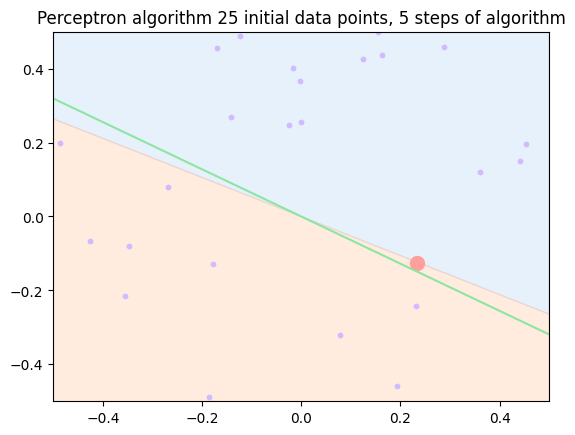

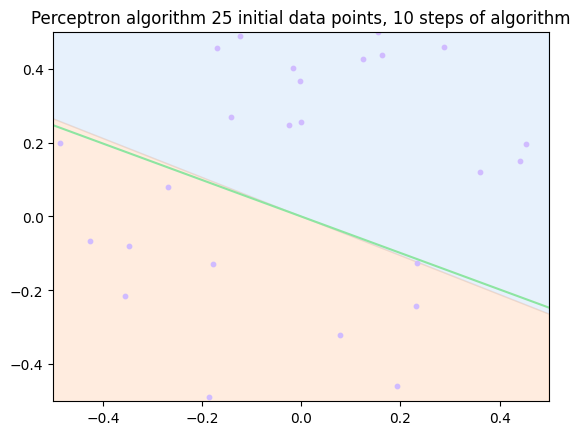

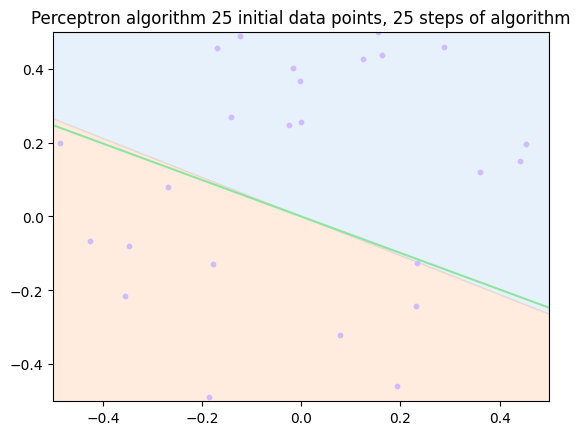

In [227]:
visual_perceptron(5, last_points=True)   
visual_perceptron(10, last_points=True)   
visual_perceptron(25, last_points=True)   


In [228]:
interact(visual_perceptron,
         j=IntSlider(min=0, max=l-1, step=1, value=3), 
         last_points=True)

interactive(children=(IntSlider(value=3, description='j', max=49), Checkbox(value=True, description='last_poin…

<function __main__.visual_perceptron(j, last_points=False)>

### Two facets of appoximate correctness revisited

One can use a geometric argument to show that at some point the algorithm teminates and that when it does so the computed line classifies all of the purple dots the same as the original line. 

However, nothing about this geometric argument guarantees that the second computed  lined is going to agree exactly with the original line. 

Nonetheless, observation suggests that the area between the two lines is small, and gets smaller the more one increases the number of original purple dots. Since the area is going proxy for probability of points in this case, this means that the observed phenomena is that the probability that the computed line and the original line agree is really high, as one increases the number of original purple dots

What explains this second aspect of correctness? 

It turns out that the relevant feature is: the hypotheses we are considering (namley lines) are comparatively simple in a certain sense.

## VC dimension

Suppose that one has $n$ points $\Omega =\{\omega_1, \ldots, \omega_n\}$ on the Euclidean plane, where we write $\omega_i =(x_i, y_i)$ with their $x$- and $y$-coordinates.

There are $2^n$ many subsets of $\Omega$.

How many of them can one generate via lines?